In [1]:

#dependencies
import tweepy
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone
from config import  consumer_key, consumer_secret, access_token, access_token_secret 

In [2]:
#import vader for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:

#autheticate#autheti 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#make dictionary of twitter SNs, network names, and colors for graphs
news_labels = ["@CNN", "@BBCWorld", "@CBSNews", "@nytimes", "@FoxNews"]
colors = ['red', 'blue','lightblue', 'green', 'yellow']

In [5]:
#create empty dictionary for data returned from json dump
news_dict = {
    "Screen Name": [],
    "Tweet": [],
    "Date": [],
    "Compound Score": [],
    "Positive Score": [],
    "Negative Score": [],
    "Neutral Score": [],
    "Tweets Ago": []
}

In [6]:
# Print out one news label to get example json 
oldest_tweet = None

target_user = "BBCWorld"
public_tweets = api.user_timeline(target_user, count=100, result_type="recent", max_id=oldest_tweet)
# print(public_tweets) 
print(json.dumps(public_tweets, indent=4, sort_keys=True))

[
    {
        "contributors": null,
        "coordinates": null,
        "created_at": "Sat Jun 09 22:40:30 +0000 2018",
        "entities": {
            "hashtags": [],
            "symbols": [],
            "urls": [
                {
                    "display_url": "bbc.in/2LE8N6O",
                    "expanded_url": "https://bbc.in/2LE8N6O",
                    "indices": [
                        44,
                        67
                    ],
                    "url": "https://t.co/lzB0N8d2dG"
                }
            ],
            "user_mentions": []
        },
        "favorite_count": 294,
        "favorited": false,
        "geo": null,
        "id": 1005580423131533315,
        "id_str": "1005580423131533315",
        "in_reply_to_screen_name": null,
        "in_reply_to_status_id": null,
        "in_reply_to_status_id_str": null,
        "in_reply_to_user_id": null,
        "in_reply_to_user_id_str": null,
        "is_quote_status": false,
        "lang"

In [7]:
# Create variable for holding the oldest tweet
oldest_tweet = None
counter = 1
for news_org in news_labels:
    # Get all tweets from home feed
    public_tweets = api.user_timeline(news_org, count=100, result_type="recent", max_id=oldest_tweet) 
    
    # Loop through all tweets
    for tweet in public_tweets:
           
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        date = tweet['created_at'] #time created
        convert_date = datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y") 
        tweets = tweet["text"]
        name = tweet["user"]["screen_name"]

       # Add each value to the appropriate list
        news_dict["Screen Name"].append(name)
        news_dict["Tweet"].append(tweets)
        news_dict["Compound Score"].append(compound)
        news_dict["Positive Score"].append(pos)
        news_dict["Negative Score"].append(neg)
        news_dict["Neutral Score"].append(neu)
        news_dict["Date"].append(convert_date) 
        news_dict["Tweets Ago"].append(counter)
        counter += 1

In [8]:
#Create to dataframe type
news_df = pd.DataFrame.from_dict(news_dict, orient='index')


In [9]:
news_tweets = news_df.transpose()
news_tweets

,Screen Name,Tweet,Date,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,CNN,The race to save the Great Barrier Reef? A cor...,2018-06-09 22:30:05+00:00,0.765,0.329,0.145,0.526,1
1,CNN,Tyler Soloman wiped tears of joy off his face ...,2018-06-09 22:15:00+00:00,0.5859,0.223,0.074,0.703,2
2,CNN,News of Anthony Bourdain’s death shook people ...,2018-06-09 22:00:13+00:00,-0.6486,0,0.218,0.782,3
3,CNN,"First responders in Russellville, Arkansas, we...",2018-06-09 21:53:00+00:00,0.2732,0.1,0,0.9,4
4,CNN,"Danny Kirwan, a guitarist who appeared on five...",2018-06-09 21:45:05+00:00,-0.5574,0,0.159,0.841,5
5,CNN,JUST IN: Canadian Prime Minister Justin Trudea...,2018-06-09 21:37:48+00:00,-0.296,0,0.115,0.885,6
6,CNN,"Her rare skin condition keeps her indoors, but...",2018-06-09 21:10:05+00:00,0.5927,0.185,0,0.815,7
7,CNN,An internal Census Bureau memo sent to Commerc...,2018-06-09 21:00:06+00:00,-0.1027,0,0.072,0.928,8
8,CNN,Secretary of State Mike Pompeo reiterated US c...,2018-06-09 20:50:07+00:00,0,0,0,1,9
9,CNN,Syracuse University has suspended 15 members o...,2018-06-09 20:40:09+00:00,-0.4767,0,0.154,0.846,10


In [10]:
news_tweets.to_csv('news_analysis.csv')  # output csv

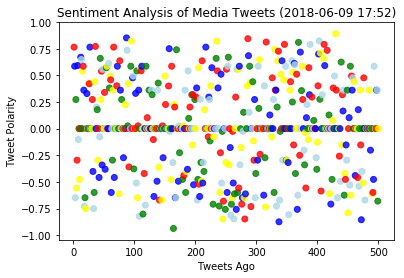

In [11]:
# for i in np.arange(0,len(news_labels)):
#     # Get the name of the news source, i.e., BBC 
#     news_source = news_tweets.loc[news_dfs["Screen Name"]==news_labels[i]]
#     # Now get the integers 0-100 of the tweets from the news source
#     news_source = news_source.sort_values("Tweets Ago")
#     # Build the scatter plot
#     plt.scatter(np.arange(len(news_source["Compound Score"])), 
#             # Set the Compound Score to a color and add the news source to the label. 
#             news_source["Compound Score"], color = colors[i],
#             edgecolor="black", linewidths=1, marker="o",
#             alpha=0.8,label = news_labels[i])

colors = ['red', 'blue','lightblue', 'green', 'yellow']

# Create plot
x_vals = news_tweets["Tweets Ago"]
y_vals = news_tweets["Compound Score"]
plt.scatter(x_vals,
         y_vals, marker="o", color = colors,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
# plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('tweets_scatter.png', bbox_inches = 'tight')
plt.show()

In [12]:
news_tweets.dtypes

Screen Name       object
Tweet             object
Date              object
Compound Score    object
Positive Score    object
Negative Score    object
Neutral Score     object
Tweets Ago        object
dtype: object

In [13]:
news_tweets["Compound Score"] = news_tweets["Compound Score"].astype(str).astype(float)

Screen Name
BBCWorld   -0.025938
CBSNews    -0.081043
CNN         0.118306
FoxNews     0.008592
nytimes     0.072044
Name: Compound Score, dtype: float64


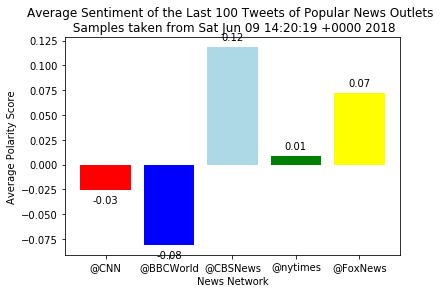

In [14]:

# group by SN and find average of each group# group b 
scores_by_org = news_tweets.groupby('Screen Name')['Compound Score'].mean()
print(scores_by_org)

# bar chart of mean scores labels
plt.title('Average Sentiment of the Last 100 Tweets of Popular News Outlets \n Samples taken from %s' % (date))
plt.xlabel('News Network')
plt.ylabel('Average Polarity Score')

# list from group by network
xlabels = scores_by_org.index
# location of each bar
xvals = np.arange(len(scores_by_org))
y_min = -1.0
y_max = 0.4
count = 0 # for x coord location of value label

#create each value label
for score in scores_by_org: 
    if score < 0: #for neg scores, put label under
        height = score - .01
    else: # for + scores, put label above
        height = score + .01
    plt.text(count, height, str(round(score, 2)), ha = 'center', va = 'center')
    count += 1
plt.bar(xvals, 
        scores_by_org, 
        color = colors, # sets colors from news_labels dict from xlabel list
        tick_label = news_labels)
plt.savefig('average_scores.png')
plt.show()